In [1]:
import vis

In [2]:
from keras.applications.densenet import DenseNet201
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np

model = DenseNet201(weights='imagenet')

img_path = 'cat1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

84082688/84080072 [==============================] - 151s 2us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.5508268), ('n02123045', 'tabby', 0.16196239), ('n02127052', 'lynx', 0.05132422)]


In [5]:
x.shape

(1, 224, 224, 3)

In [4]:
preds = model.predict(x)

In [9]:
print(preds)
amx = np.amax(preds)
print(amx)
print(np.where(preds==amx))

[[1.97166651e-06 8.34793627e-06 3.22369233e-05 4.04429520e-05
  1.19571941e-05 3.91612884e-05 2.63070688e-05 2.13621188e-05
  2.81518995e-04 2.51617985e-05 4.16349440e-06 2.94052006e-05
  1.01526148e-05 6.83947073e-05 1.88954255e-06 9.73552378e-05
  2.06993558e-04 8.18113040e-05 1.08513508e-04 3.34597235e-06
  3.07233931e-05 1.84643519e-04 9.98202377e-05 8.06930911e-05
  1.51900423e-03 2.92856566e-06 9.38026187e-06 1.10169749e-05
  9.77782838e-06 7.17560979e-05 3.71334090e-06 6.77118578e-06
  5.55879069e-07 2.27165955e-07 2.39034216e-06 5.19188802e-07
  3.69814074e-06 2.25890631e-06 5.38780041e-05 6.61447666e-06
  2.43156810e-05 1.02588583e-05 8.69034557e-06 1.58388648e-05
  3.89195811e-05 4.94857659e-07 3.97279837e-05 6.22282823e-06
  2.52724448e-07 7.74617490e-07 3.51234064e-07 2.41534235e-06
  5.60928529e-05 5.60127455e-06 6.60402566e-06 5.21647280e-06
  1.40009831e-06 1.49260461e-06 1.40492818e-06 1.24369180e-05
  7.90555987e-06 6.52064386e-07 2.28353792e-06 5.15360227e-07
  1.9417

(array([0], dtype=int64), array([285], dtype=int64))


In [11]:
preds[0,285]

0.5508268

In [15]:
224/8 # kernel can be any power of 2

28.0

In [20]:
np.min(x)

-2.117904

In [21]:
np.max(x)

2.64

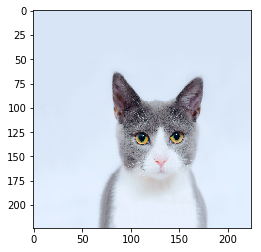

In [22]:
x2 = np.reshape(x, (224,224,3))
mn = np.min(x)
mx = np.max(x)
x2 = (x2-mn)/(mx-mn)
plt.imshow(x2)
plt.show()

In [35]:
for r in range(0,224,16):
    print(r)

0
16
32
48
64
80
96
112
128
144
160
176
192
208


In [37]:
14*14

196

In [42]:
np.sum((preds - (preds - 1))**2)

1000.0

In [43]:
import matplotlib.pyplot as plt

x_k = 16
y_k = 16

x3 = x
mn = np.min(x)
mx = np.max(x)
x3 = (x3-mn)/(mx-mn)
cnt = 1

scores = []

for r in range(0,224,x_k):
    for c in range(0,224,y_k):
        #plt.figure(cnt)
        #c_img = x3[:,r:r+x_k,c:c+y_k,:]
        #c_img = np.reshape(c_img,(x_k,y_k,3))
        x2 = np.copy(x)
        x2[:,r:r+x_k,c:c+y_k,:] = np.zeros((1,x_k,y_k,3))
        preds2 = model.predict(x2)
        scores.append(np.sum((preds-preds2)**2))
        #plt.imshow(c_img)
        print(r,c)
        
        cnt = cnt+1
        #plt.show()

0 0
0 16
0 32
0 48
0 64
0 80
0 96
0 112
0 128
0 144
0 160
0 176
0 192
0 208
16 0
16 16
16 32
16 48
16 64
16 80
16 96
16 112
16 128
16 144
16 160
16 176
16 192
16 208
32 0
32 16
32 32
32 48
32 64
32 80
32 96
32 112
32 128
32 144
32 160
32 176
32 192
32 208
48 0
48 16
48 32
48 48
48 64
48 80
48 96
48 112
48 128
48 144
48 160
48 176
48 192
48 208
64 0
64 16
64 32
64 48
64 64
64 80
64 96
64 112
64 128
64 144
64 160
64 176
64 192
64 208
80 0
80 16
80 32
80 48
80 64
80 80
80 96
80 112
80 128
80 144
80 160
80 176
80 192
80 208
96 0
96 16
96 32
96 48
96 64
96 80
96 96
96 112
96 128
96 144
96 160
96 176
96 192
96 208
112 0
112 16
112 32
112 48
112 64
112 80
112 96
112 112
112 128
112 144
112 160
112 176
112 192
112 208
128 0
128 16
128 32
128 48
128 64
128 80
128 96
128 112
128 128
128 144
128 160
128 176
128 192
128 208
144 0
144 16
144 32
144 48
144 64
144 80
144 96
144 112
144 128
144 144
144 160
144 176
144 192
144 208
160 0
160 16
160 32
160 48
160 64
160 80
160 96
160 112
160 128
160 144


In [44]:
print(scores)

[0.0018144734, 0.0022821752, 0.003316256, 0.0044560893, 0.003998181, 0.0044236225, 0.0052049016, 0.006308221, 0.01039925, 0.0051099095, 0.0044208416, 0.00492714, 0.0046276203, 0.0045240433, 0.0031678015, 0.0036996126, 0.015979603, 0.02136099, 0.015734393, 0.021244945, 0.039759424, 0.048548713, 0.049569614, 0.032949694, 0.019276721, 0.009828269, 0.0042776014, 0.0021976905, 0.0026711829, 0.00698722, 0.011679353, 0.0219187, 0.022761282, 0.027049147, 0.0316572, 0.045079477, 0.04183005, 0.023451198, 0.021498378, 0.017943444, 0.013474029, 0.0018894215, 0.0029187188, 0.0032058118, 0.009031505, 0.013394534, 0.0036340961, 0.0030878412, 0.0034007751, 0.019343097, 0.017007612, 0.00810037, 0.0009870849, 0.007001365, 0.0045449925, 0.0014475092, 0.0039067636, 0.008135488, 0.0069639836, 0.0037853506, 0.001912793, 0.0033673088, 0.006525776, 0.0012196803, 0.0007965119, 0.0024336122, 0.004586283, 0.0019822204, 0.005184428, 0.0028530264, 0.002039278, 0.0076016136, 0.012814437, 0.008686204, 0.0028214485, 

In [48]:
mn = np.min(scores)

In [49]:
mx = np.max(scores)

In [50]:
scores = (scores - mn)/(mx-mn)

In [51]:
print(scores)

[1.15931062e-02 1.49275130e-02 2.22998261e-02 3.04260869e-02
 2.71615013e-02 3.01946197e-02 3.57646234e-02 4.36305627e-02
 7.27969036e-02 3.50873955e-02 3.01747937e-02 3.37843709e-02
 3.16489898e-02 3.09105553e-02 2.12414451e-02 2.50329059e-02
 1.12581141e-01 1.50946885e-01 1.10832959e-01 1.50119558e-01
 2.82115579e-01 3.44777435e-01 3.52055788e-01 2.33566701e-01
 1.36087418e-01 6.87261820e-02 2.91535854e-02 1.43251922e-02
 1.77008808e-02 4.84713838e-02 8.19231942e-02 1.54922977e-01
 1.60930037e-01 1.91499695e-01 2.24352077e-01 3.20044070e-01
 2.96877801e-01 1.65848687e-01 1.51926368e-01 1.26582026e-01
 9.47180465e-02 1.21274367e-02 1.94656495e-02 2.15124339e-02
 6.30457848e-02 9.41513032e-02 2.45658178e-02 2.06713807e-02
 2.29023937e-02 1.36560634e-01 1.19910166e-01 5.64074032e-02
 5.69437165e-03 4.85722274e-02 3.10599077e-02 8.97689257e-03
 2.65097581e-02 5.66577725e-02 4.83057201e-02 2.56441627e-02
 1.22940606e-02 2.26638000e-02 4.51815873e-02 7.35262316e-03
 4.33571124e-03 1.600715

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

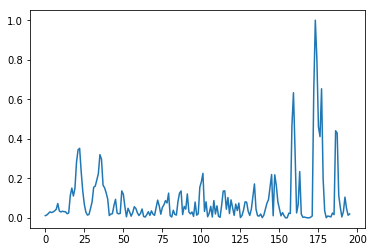

In [52]:
plt.plot(scores)
plt.show()

In [56]:
cnt = 0
x_cop = np.zeros((224,224), dtype='float32')
for r in range(0,224,x_k):
    for c in range(0,224,y_k):
        #plt.figure(cnt)
        x_cop[r:r+x_k,c:c+y_k] = scores[cnt]*np.ones((x_k,y_k))

        #plt.imshow(c_img)
        print(r,c)
        
        cnt = cnt+1
        #plt.show()

0 0
0 16
0 32
0 48
0 64
0 80
0 96
0 112
0 128
0 144
0 160
0 176
0 192
0 208
16 0
16 16
16 32
16 48
16 64
16 80
16 96
16 112
16 128
16 144
16 160
16 176
16 192
16 208
32 0
32 16
32 32
32 48
32 64
32 80
32 96
32 112
32 128
32 144
32 160
32 176
32 192
32 208
48 0
48 16
48 32
48 48
48 64
48 80
48 96
48 112
48 128
48 144
48 160
48 176
48 192
48 208
64 0
64 16
64 32
64 48
64 64
64 80
64 96
64 112
64 128
64 144
64 160
64 176
64 192
64 208
80 0
80 16
80 32
80 48
80 64
80 80
80 96
80 112
80 128
80 144
80 160
80 176
80 192
80 208
96 0
96 16
96 32
96 48
96 64
96 80
96 96
96 112
96 128
96 144
96 160
96 176
96 192
96 208
112 0
112 16
112 32
112 48
112 64
112 80
112 96
112 112
112 128
112 144
112 160
112 176
112 192
112 208
128 0
128 16
128 32
128 48
128 64
128 80
128 96
128 112
128 128
128 144
128 160
128 176
128 192
128 208
144 0
144 16
144 32
144 48
144 64
144 80
144 96
144 112
144 128
144 144
144 160
144 176
144 192
144 208
160 0
160 16
160 32
160 48
160 64
160 80
160 96
160 112
160 128
160 144


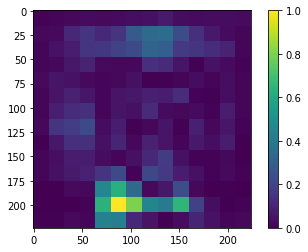

In [62]:
plt.imshow(x_cop)
plt.colorbar()
plt.show()

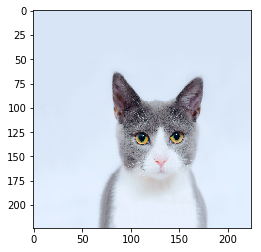

In [60]:
x2 = np.reshape(x, (224,224,3))
mn = np.min(x)
mx = np.max(x)
x2 = (x2-mn)/(mx-mn)
plt.imshow(x2)
plt.show()